## Inicialisation

In [83]:
import numpy as np
import pandas as pd
import statsmodels
import sklearn
import seaborn
import plotly
import matplotlib.pyplot as plt


In [84]:
# Main dataset
sales = pd.read_csv('../data/sales_train.csv')

# Data-Dicts
items = pd.read_csv('../data/dicts/items.csv')
items_categories = pd.read_csv('../data/dicts/item_categories.csv')
shops = pd.read_csv('../data/dicts/shops.csv')

# Folder - Sumbission data 
submission = pd.read_csv('../data/submission_data/sample_submission.csv')
# a sample submission file in the correct format.

test = pd.read_csv('../data/submission_data/test.csv') 
# the test set. You need to forecast the sales 
# for these shops and products for November 2015.

In [85]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [86]:
sales.head(50)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


# DQC & ETL

## Feature  dTypes and simple statistics

In [87]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [88]:
sales['date'] = pd.to_datetime(sales['date'], format='%d.%m.%Y')
# sales_sorted = sales.sort_values('date')

In [89]:
with pd.option_context('display.float_format', '{:.1f}'.format):
    print(sales[['item_price','item_cnt_day']].describe())

       item_price  item_cnt_day
count   2935849.0     2935849.0
mean        890.9           1.2
std        1729.8           2.6
min          -1.0         -22.0
25%         249.0           1.0
50%         399.0           1.0
75%         999.0           1.0
max      307980.0        2169.0


## Missing values

In [90]:
sales.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

## Duplicates

In [91]:
sales.duplicated().sum()

6

In [92]:
sales[sales.duplicated(keep=False)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76961,2013-01-05,0,54,20130,149.0,1.0
76962,2013-01-05,0,54,20130,149.0,1.0
1435365,2014-02-23,13,50,3423,999.0,1.0
1435367,2014-02-23,13,50,3423,999.0,1.0
1496765,2014-03-23,14,21,3423,999.0,1.0
1496766,2014-03-23,14,21,3423,999.0,1.0
1671872,2014-05-01,16,50,3423,999.0,1.0
1671873,2014-05-01,16,50,3423,999.0,1.0
1866322,2014-07-12,18,25,3423,999.0,1.0
1866340,2014-07-12,18,25,3423,999.0,1.0


Those duplicates should be removed, there small amount of them, but all of them are clearly missing structure which data table provides on the first place. Bc item_cnt_day should represent number of products sold for exact type of product, it's supposed to be agregated feature and cannot be duplicated. Also all of duplicated pares have the same price. 

In [93]:
sales = sales.drop_duplicates().reset_index(drop=True)

## Inconsistencies

### Dicts values check

 Are all of the porvided id's are described in dicts ?

In [94]:
print('Amount of item_category_id in items which are not listed in items_categories: ',\
       items['item_category_id'].isin(items_categories['item_category_id']).sum() - items['item_category_id'].shape[0])

Amount of item_category_id in items which are not listed in items_categories:  0


In [95]:
print('Amount of item_id in main dataset which are not listed in items dicts: ' ,\
      sales['item_id'].isin(items['item_id']).sum() - sales.shape[0])

Amount of item_id in main dataset which are not listed in items dicts:  0


In [96]:
print('Amount of shop_id in main dataset which are not listed in shops dict: ' ,\
       sales['shop_id'].isin(shops['shop_id']).sum() - sales.shape[0])

Amount of shop_id in main dataset which are not listed in shops dict:  0


In [97]:
print('Amount of shop_id in main dataset which are not listed in shops dict: ' ,\
      test['shop_id'].isin(shops['shop_id']).sum() - test.shape[0])

Amount of shop_id in main dataset which are not listed in shops dict:  0


In [98]:
print('Amount of item_id in test dataset which are not listed in items dicts: ' ,\
      test['item_id'].isin(items['item_id']).sum() - test.shape[0])

Amount of item_id in test dataset which are not listed in items dicts:  0


Checking shops dictionary:

In [99]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


shop_id's which duplicates each other :
 - 10 and 11 are the same
 - 1 and 58
 - 0 and 57
 - 40 and 39
 - 23 and 24

In [100]:
shop_id_replacements = {10: 11, 1: 58, 0: 57, 40: 39}

In [101]:
# test[test['shop_id'].isin(shop_id_replacements.keys())]['shop_id'].value_counts()

In [102]:
for old_id, new_id in shop_id_replacements.items():
    if old_id in test['shop_id'].values and new_id in test['shop_id'].values:
        print(f'⚠️ Shops {old_id} and {new_id} duplicates each other in test')
    else:
        print(f'No simultaneous presence of {old_id} shop_id and {new_id} in test')

No simultaneous presence of 10 shop_id and 11 in test
No simultaneous presence of 1 shop_id and 58 in test
No simultaneous presence of 0 shop_id and 57 in test
No simultaneous presence of 40 shop_id and 39 in test


In [103]:
sales['shop_id'] = sales['shop_id'].replace(shop_id_replacements)
test['shop_id'] = test['shop_id'].replace(shop_id_replacements)

Since we now clearly know that we have some duplicates in shops, we should summ item_cnt_day for them

In [104]:
print('Amount of duplicates after dicts replacement : ', sales.duplicated().sum())
sales_sorted = sales.sort_values('date')
sales_sorted[(sales_sorted.duplicated(keep= False))].head(50)

Amount of duplicates after dicts replacement :  180


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1531181,2014-03-01,14,39,4351,399.0,1.0
1533229,2014-03-01,14,39,4351,399.0,1.0
1530930,2014-03-02,14,39,9862,399.0,1.0
1533580,2014-03-02,14,39,20606,799.0,1.0
1533969,2014-03-02,14,39,20606,799.0,1.0
1533152,2014-03-02,14,39,9862,399.0,1.0
1533888,2014-03-05,14,39,20608,1299.0,1.0
1533574,2014-03-05,14,39,20608,1299.0,1.0
1533298,2014-03-07,14,39,16169,299.0,1.0
1533151,2014-03-07,14,39,9862,399.0,1.0


In [105]:
sales = sales.groupby(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price'], as_index=False).agg({'item_cnt_day': 'sum'})
print('Amount of duplicates after grouping : ', sales.duplicated().sum())

Amount of duplicates after grouping :  0


### Adding shops, items, and categories names

Based on dictionaries values of shops, items, and categories. It would be good to add some additional categories with grouping categories_names by their type, and shops by cities. 

In [106]:
items_categories[0:50]

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [107]:
items_categories['general_item_category_name'] = items_categories['item_category_name'].\
    apply(lambda x: 'Игровые консоли'  if x.split()[0] == 'Игровые' else x.split()[0] )

In [108]:
items_categories[0:50]

,item_category_name,item_category_id,general_item_category_name
0,PC - Гарнитуры/Наушники,0,PC
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары
5,Аксессуары - PSVita,5,Аксессуары
6,Аксессуары - XBOX 360,6,Аксессуары
7,Аксессуары - XBOX ONE,7,Аксессуары
8,Билеты (Цифра),8,Билеты
9,Доставка товара,9,Доставка


The same idea is better to apply to cities of shops

In [109]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [110]:
shops['city'] = shops['shop_name'].apply(lambda x: 'Якутск'  if x.split()[0] == '!Якутск' else x.split()[0] )

In [111]:
sales = sales.merge(items, on='item_id', how='left')
sales = sales.merge(items_categories, on = 'item_category_id', how = 'left')
sales = sales.merge(shops, on = 'shop_id', how = 'left')

In [112]:
sales.sample(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,general_item_category_name,shop_name,city
2836733,2015-09-04,32,7,20613,1099.0,1.0,Фигурка Minecraft Series 2 Diamond Steve With ...,72,Подарки - Фигурки,Подарки,"Воронеж ТРЦ ""Максимир""",Воронеж
841943,2013-09-02,8,13,4870,504.0,1.0,"Minecraft [Xbox 360, английская версия]",23,Игры - XBOX 360,Игры,"Казань ТЦ ""Бехетле""",Казань
402957,2013-04-19,3,52,5034,1199.0,1.0,"NHL 13 [Xbox 360, русская документация]",23,Игры - XBOX 360,Игры,"Уфа ТК ""Центральный""",Уфа
2160889,2014-11-20,22,39,2293,999.0,1.0,Call of Duty: Advanced Warfare. Day Zero Editi...,28,Игры PC - Дополнительные издания,Игры,"РостовНаДону ТРК ""Мегацентр Горизонт""",РостовНаДону
2173998,2014-11-24,22,30,3462,2999.0,1.0,"Far Cry 4. Специальное издание [PS4, русская в...",20,Игры - PS4,Игры,"Москва ТЦ ""Перловский""",Москва
2051982,2014-10-10,21,7,20949,5.0,3.0,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",Подарки,"Воронеж ТРЦ ""Максимир""",Воронеж
650614,2013-07-07,6,11,20216,325.0,1.0,ФЕИ (КОЛЛЕКЦИЯ),41,Кино - Коллекционное,Кино,Жуковский ул. Чкалова 39м²,Жуковский
1747462,2014-06-15,17,44,1441,500.0,1.0,App Store 500 руб.,32,"Карты оплаты (Кино, Музыка, Игры)",Карты,"Самара ТЦ ""Мелодия""",Самара
1318404,2014-01-14,12,7,3313,799.0,1.0,"FIFA 12 (Classics) [Xbox 360, русская версия]",23,Игры - XBOX 360,Игры,"Воронеж ТРЦ ""Максимир""",Воронеж
1225552,2013-12-26,11,58,15470,379.0,2.0,Мягкая игрушка Том и Джерри Джерри 15 см,63,Подарки - Мягкие игрушки,Подарки,"Якутск ТЦ ""Центральный""",Якутск


## Outliers

### Item prices

In [113]:
sales.shape[0]

2935426

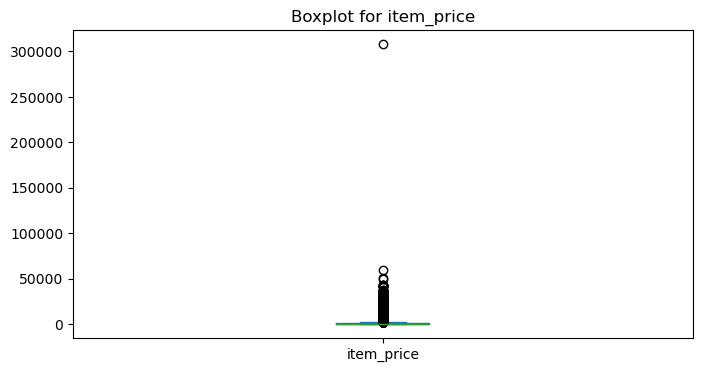

In [114]:
plt.figure(figsize=(8, 4))
sales['item_price'].plot.box()
plt.title('Boxplot for item_price')
plt.show()

Quatniles estimation:

In [115]:
item_price_q99 = sales['item_price'].quantile(0.99)
item_price_q01 = sales['item_price'].quantile(0.01)
print('quantile 99:', item_price_q99 )
print('item_price amount of observations higher than q99:',sales[sales['item_price']>item_price_q99]['item_id'].count())
print('-'*20)
print('quantile 01:',item_price_q01)
print('item_price amount of observations lower than q01:',sales[sales['item_price']<item_price_q01]['item_id'].count())

quantile 99: 5999.0
item_price amount of observations higher than q99: 28713
--------------------
quantile 01: 5.0
item_price amount of observations lower than q01: 6319


In [116]:
print( sales[sales['item_price']<=0] ) # Observations with negative or zero price
sales = sales[sales['item_price'] > 0] # Assigning only positive price

             date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
482377 2013-05-15               4       32     2973        -1.0           1.0   

                                        item_name  item_category_id  \
482377  DmC Devil May Cry [PS3, русские субтитры]                19   

       item_category_name general_item_category_name  \
482377         Игры - PS3                       Игры   

                         shop_name    city  
482377  Москва ТЦ "Серебряный Дом"  Москва  


As we can see, there a lot outliers there, and we cannot remove them, since we might remove some expensive categories entirely. We will use .clip() to round outliers to feasible values but will save data about prices outliers

In [117]:
sales['was_item_price_outlier'] = ( sales['item_price'] > item_price_q99 ).astype('int8')

In [118]:
sales['item_price'] = sales['item_price'].clip(0,item_price_q99)
sales.shape[0]

2935425

After Clipping: 

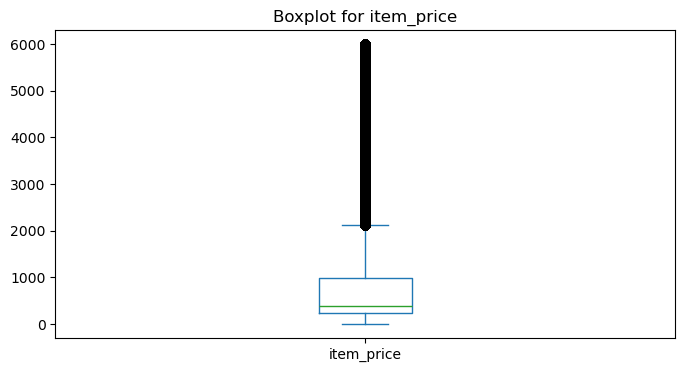

In [119]:
plt.figure(figsize=(8, 4))
sales['item_price'].plot.box()
plt.title('Boxplot for item_price')
plt.show()

Negative prices removed, outlier from higher bound are tagged and rounded to lower values

### Amount of items sold in a day, in a single shop

Let's check another quantative feature - amount of sold exact items_id by a single day

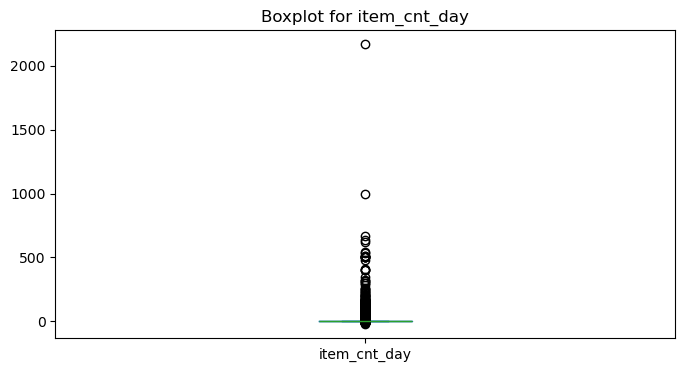

In [120]:
plt.figure(figsize=(8, 4))
sales['item_cnt_day'].plot.box()
plt.title('Boxplot for item_cnt_day')
plt.show()

From first glance on the main dataset also noted that item_cnt_day has some negative values, let's check it and do a quantile estimation:

In [121]:
item_cnt_day_q99 = sales['item_cnt_day'].quantile(0.99)
item_cnt_day_q01 = sales['item_cnt_day'].quantile(0.01)
print('quantile 99:', item_cnt_day_q99 )
print('item_cnt_day amount of observations higher than q99:', sales[sales['item_cnt_day']>item_cnt_day_q99]['item_id'].count())
print('-'*20)
print('quantile 01:',item_cnt_day_q01)
print('item_cnt_day amount of observations lower than q01:', sales[sales['item_cnt_day']<item_cnt_day_q01]['item_id'].count())

print('-'*20)
print('Amount of items listed as sold in amount of zero : ', sales[sales['item_cnt_day'] == 0]['item_cnt_day'].count()) 
print('Amount of unique items_id listed as sold in a negative amount: ', sales[sales['item_cnt_day']<0]['item_id'].nunique())

quantile 99: 5.0
item_cnt_day amount of observations higher than q99: 27451
--------------------
quantile 01: 1.0
item_cnt_day amount of observations lower than q01: 7356
--------------------
Amount of items listed as sold in amount of zero :  0
Amount of unique items_id listed as sold in a negative amount:  3511


Let's calculate how big part of returned items, out of all sold items overall

negative_sold_amount_sum:  -7541.0
positive_sold_amount_sum:  3655740.0
Percentage of returns comapre to all sold items: 0.21%


<Axes: >

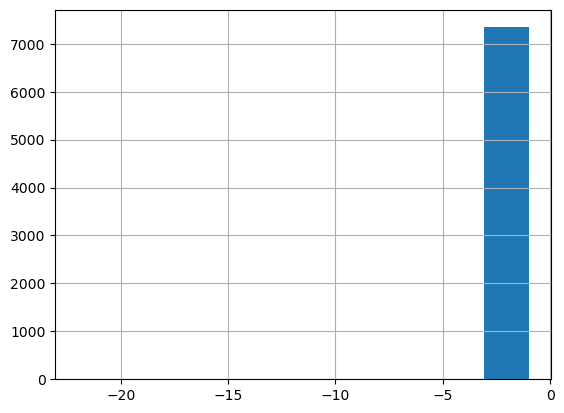

In [122]:
negative_sold_amount_sum = sales[sales['item_cnt_day']<0]['item_cnt_day'].sum() # sum of all returned back items
print('negative_sold_amount_sum: ', negative_sold_amount_sum)
positive_sold_amount_sum = sales[sales['item_cnt_day']>0]['item_cnt_day'].sum() # sum of all sold items 
print('positive_sold_amount_sum: ', positive_sold_amount_sum)
n_vs_p = negative_sold_amount_sum / positive_sold_amount_sum *100 *(-1)
print(f'Percentage of returns comapre to all sold items: {n_vs_p:.2f}%')
sales[sales['item_cnt_day'] < 0]['item_cnt_day'].hist()

As we can see amount of returns are too low (0.21%) to keep them in our main dataset. Maybe we will come back to it later, if we will discover this feature might be usefull. Removing negative values of intem_cnt_day :

In [123]:
with_negatives_sold = sales.shape[0]
sales = sales[sales['item_cnt_day'] > 0]
without_negatives_sold = sales.shape[0]
print('Amount of items before removing those with negative sales:',with_negatives_sold)
print('Amount of items after removing items with negative sales:',without_negatives_sold)
print('Removed Obeservation where items with negative sold amount by day :',with_negatives_sold-without_negatives_sold)
# sales['item_cnt_day'] = sales['item_cnt_day'].clip(0,500)

Amount of items before removing those with negative sales: 2935425
Amount of items after removing items with negative sales: 2928069
Removed Obeservation where items with negative sold amount by day : 7356


Also it's worth to clip outlying high values. But before let's check what are they

In [124]:
sales[sales['item_cnt_day']>100][:50] # ⚠️⚠️⚠️ Before applying - run "Adding shops, items, and categories names block" to see explicit data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,general_item_category_name,shop_name,city,was_item_price_outlier
566262,2013-06-11,5,12,2808,999.000000,200.0,"Diablo III [PC, Jewel, русская версия]",30,Игры PC - Стандартные издания,Игры,Интернет-магазин ЧС,Интернет-магазин,0
578327,2013-06-14,5,42,16787,2559.746729,107.0,"Одни из нас [PS3, русская версия]",19,Игры - PS3,Игры,"СПб ТК ""Невский Центр""",СПб,0
826166,2013-08-29,7,12,2808,999.000000,150.0,"Diablo III [PC, Jewel, русская версия]",30,Игры PC - Стандартные издания,Игры,Интернет-магазин ЧС,Интернет-магазин,0
850495,2013-09-05,8,25,2808,999.000000,133.0,"Diablo III [PC, Jewel, русская версия]",30,Игры PC - Стандартные издания,Игры,"Москва ТРК ""Атриум""",Москва,0
889587,2013-09-17,8,6,3732,2520.486486,148.0,"Grand Theft Auto V [PS3, русские субтитры]",19,Игры - PS3,Игры,"Воронеж (Плехановская, 13)",Воронеж,0
889783,2013-09-17,8,12,3732,2494.754717,106.0,"Grand Theft Auto V [PS3, русские субтитры]",19,Игры - PS3,Игры,Интернет-магазин ЧС,Интернет-магазин,0
889784,2013-09-17,8,12,3734,2486.889908,109.0,"Grand Theft Auto V [Xbox 360, русские субтитры]",23,Игры - XBOX 360,Игры,Интернет-магазин ЧС,Интернет-магазин,0
890264,2013-09-17,8,25,3732,2545.135417,264.0,"Grand Theft Auto V [PS3, русские субтитры]",19,Игры - PS3,Игры,"Москва ТРК ""Атриум""",Москва,0
890265,2013-09-17,8,25,3734,2548.454545,110.0,"Grand Theft Auto V [Xbox 360, русские субтитры]",23,Игры - XBOX 360,Игры,"Москва ТРК ""Атриум""",Москва,0
890543,2013-09-17,8,28,3732,2556.633588,131.0,"Grand Theft Auto V [PS3, русские субтитры]",19,Игры - PS3,Игры,"Москва ТЦ ""МЕГА Теплый Стан"" II",Москва,0


Seems all of them are games related to day of releas of several top games, which is a rare event, we will cut off amount of them sold and create a feature "was_item_cnt_day_outlier". 

In [125]:
sales['was_item_cnt_day_outlier'] = ( sales['item_cnt_day'] >  item_cnt_day_q99 ).astype(np.int8)

In [126]:
sales['item_cnt_day'] = sales['item_cnt_day'].clip(0,item_cnt_day_q99)

"Returns" are removed, outliers with higher bound are tagged and rounded to 99th quantile value. 

In [127]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928069 entries, 0 to 2935425
Data columns (total 14 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   date                        datetime64[ns]
 1   date_block_num              int64         
 2   shop_id                     int64         
 3   item_id                     int64         
 4   item_price                  float64       
 5   item_cnt_day                float64       
 6   item_name                   object        
 7   item_category_id            int64         
 8   item_category_name          object        
 9   general_item_category_name  object        
 10  shop_name                   object        
 11  city                        object        
 12  was_item_price_outlier      int8          
 13  was_item_cnt_day_outlier    int8          
dtypes: datetime64[ns](1), float64(2), int64(4), int8(2), object(5)
memory usage: 296.0+ MB


In [128]:
sales.shape[0]

2928069

In [129]:
sales_exported = pd.read_parquet('../data/output/sales_cleaned.parquet')

In [130]:
sales_exported.shape[0]

2928069

In [131]:
missing = sales.merge(sales_exported, how='outer', indicator=True).query('_merge == "left_only"')
print('Amount of fields missing in etl.py or sales after preprocessing: ',missing.shape[0])

Amount of fields missing in etl.py or sales after preprocessing:  0


# EDA

In [132]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,general_item_category_name,shop_name,city,was_item_price_outlier,was_item_cnt_day_outlier
0,2013-01-01,0,2,991,99.0,1.0,"3D Action Puzzle ""Динозавры"" Тиранозавр",67,Подарки - Развитие,Подарки,"Адыгея ТЦ ""Мега""",Адыгея,0,0
1,2013-01-01,0,2,1472,2599.0,1.0,"Assassin's Creed 3 [Xbox 360, русская версия]",23,Игры - XBOX 360,Игры,"Адыгея ТЦ ""Мега""",Адыгея,0,0
2,2013-01-01,0,2,1905,249.0,1.0,"Bestseller. Grand Theft Auto: San Andreas [PC,...",30,Игры PC - Стандартные издания,Игры,"Адыгея ТЦ ""Мега""",Адыгея,0,0
3,2013-01-01,0,2,2920,599.0,2.0,Disney. LEGO Пираты Карибского моря (Essential...,21,Игры - PSP,Игры,"Адыгея ТЦ ""Мега""",Адыгея,0,0
4,2013-01-01,0,2,3320,1999.0,1.0,"FIFA 13 (с поддержкой PS Move) [PS3, русская в...",19,Игры - PS3,Игры,"Адыгея ТЦ ""Мега""",Адыгея,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935421,2015-10-31,33,59,20730,499.0,1.0,"Фигурка Scalers Wave 1 Alien 2""",72,Подарки - Фигурки,Подарки,"Ярославль ТЦ ""Альтаир""",Ярославль,0,0
2935422,2015-10-31,33,59,20866,699.0,1.0,Фигурка Tom Clancy's Splinter Cell Blacklist S...,72,Подарки - Фигурки,Подарки,"Ярославль ТЦ ""Альтаир""",Ярославль,0,0
2935423,2015-10-31,33,59,20949,5.0,1.0,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",Подарки,"Ярославль ТЦ ""Альтаир""",Ярославль,0,0
2935424,2015-10-31,33,59,21369,169.0,1.0,ХОББИТ: БИТВА ПЯТИ ВОИНСТВ (регион),40,Кино - DVD,Кино,"Ярославль ТЦ ""Альтаир""",Ярославль,0,0


## Price and items over all days

How the mean of item prices was changing over the whole period? 

<Axes: title={'center': 'Mean price of items across all shops by days'}, xlabel='date'>

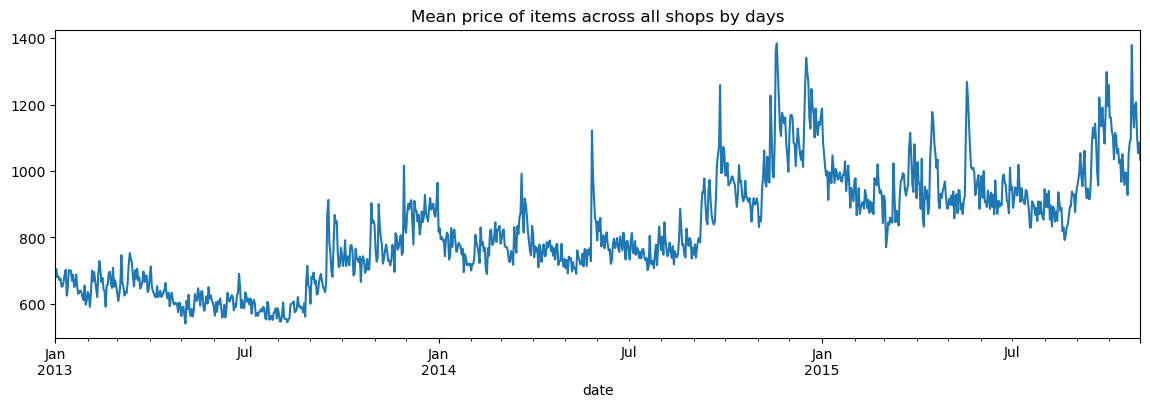

In [133]:
mean_item_prices_by_days = sales.groupby('date')['item_price'].mean()
mean_item_prices_by_days.plot(figsize=(14,4), title = 'Mean price of items across all shops by days')

In [134]:
#mean_item_prices_by_days

And how many items have been sold day by day over this period?

<Axes: title={'center': 'Amount of sold items by days across all shops'}, xlabel='date'>

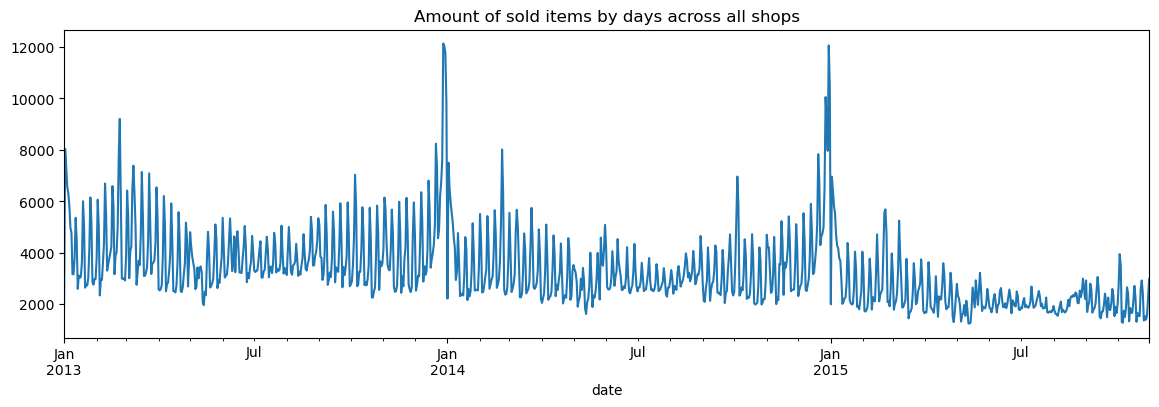

In [135]:
#daily_sales = sales.groupby('date')['item_cnt_day'].sum()
sales.groupby('date')['item_cnt_day'].sum().plot(figsize=(14, 4)\
                                                 , title='Amount of sold items by days across all shops')

In [136]:
#daily_sales

Seems we have reversed correlation. As higher price, as lower amount of products which have been sold, we keep in mind it doens't necessary mean cause and effect relationship. 

## Cities and products

<Axes: ylabel='city'>

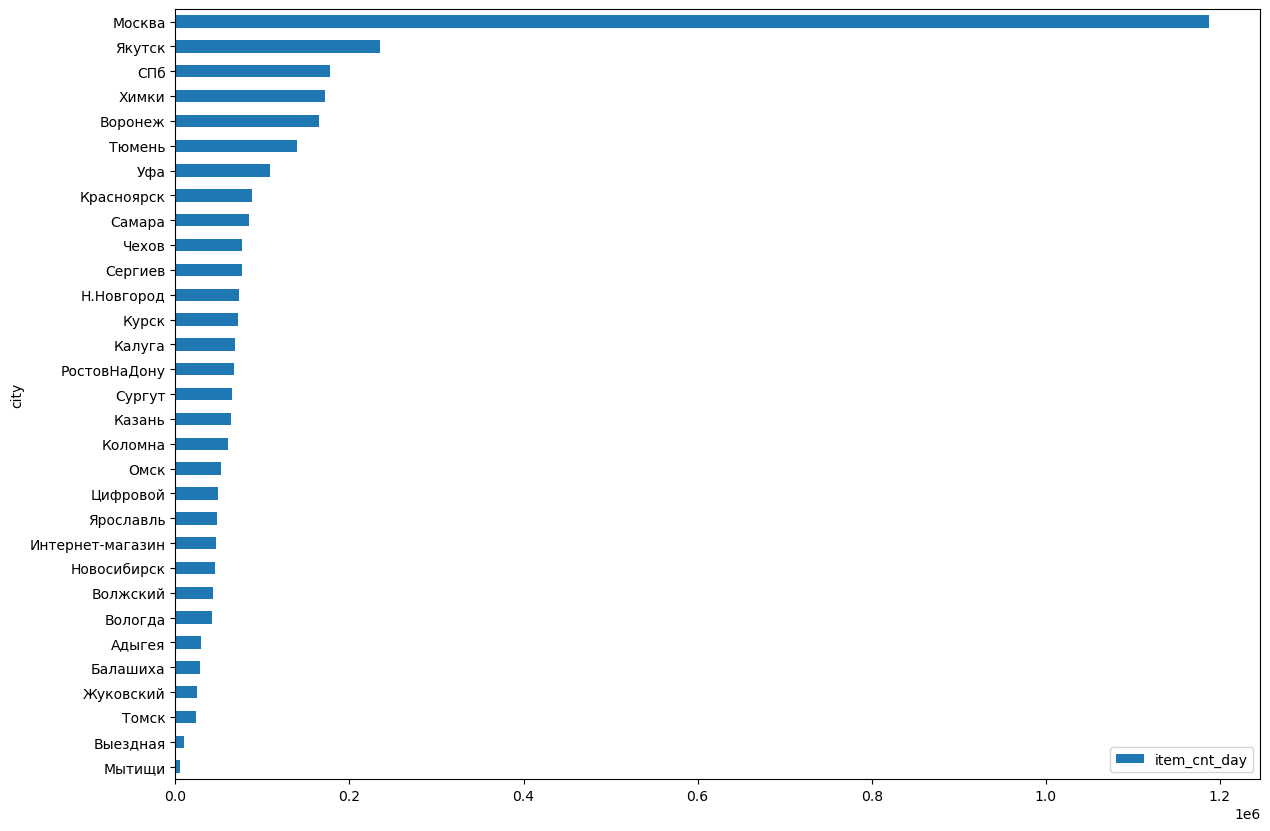

In [137]:
#sales_by_cities = sales.groupby(['city']).agg({'item_cnt_day':'sum'})
sales.groupby(['city']).agg({'item_cnt_day':'sum'}).\
    sort_values(by=['item_cnt_day']).plot(figsize=(14,10), kind = 'barh')

We have "city" feature and based on graph above it should help a lot with a right feature engineering

<Axes: ylabel='general_item_category_name'>

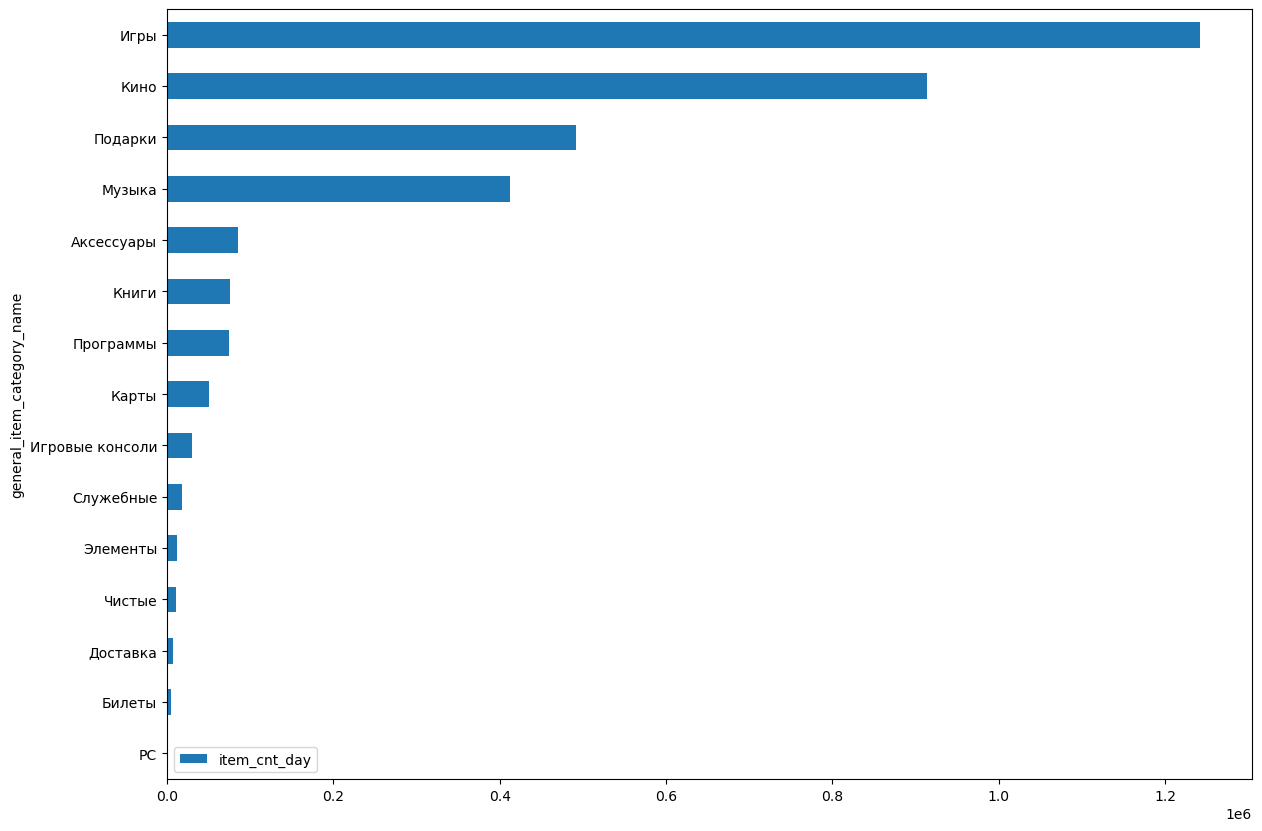

In [138]:
sales.groupby(['general_item_category_name']).agg({'item_cnt_day':'sum'}).\
    sort_values(by = ['item_cnt_day']).plot(figsize = (14,10), kind = 'barh')

Category of the item should help to predict feature sales as well

In [139]:
shop_sales = sales.groupby(['shop_name'], as_index=False).agg({'item_cnt_day': 'sum'}).sort_values(by = 'item_cnt_day')

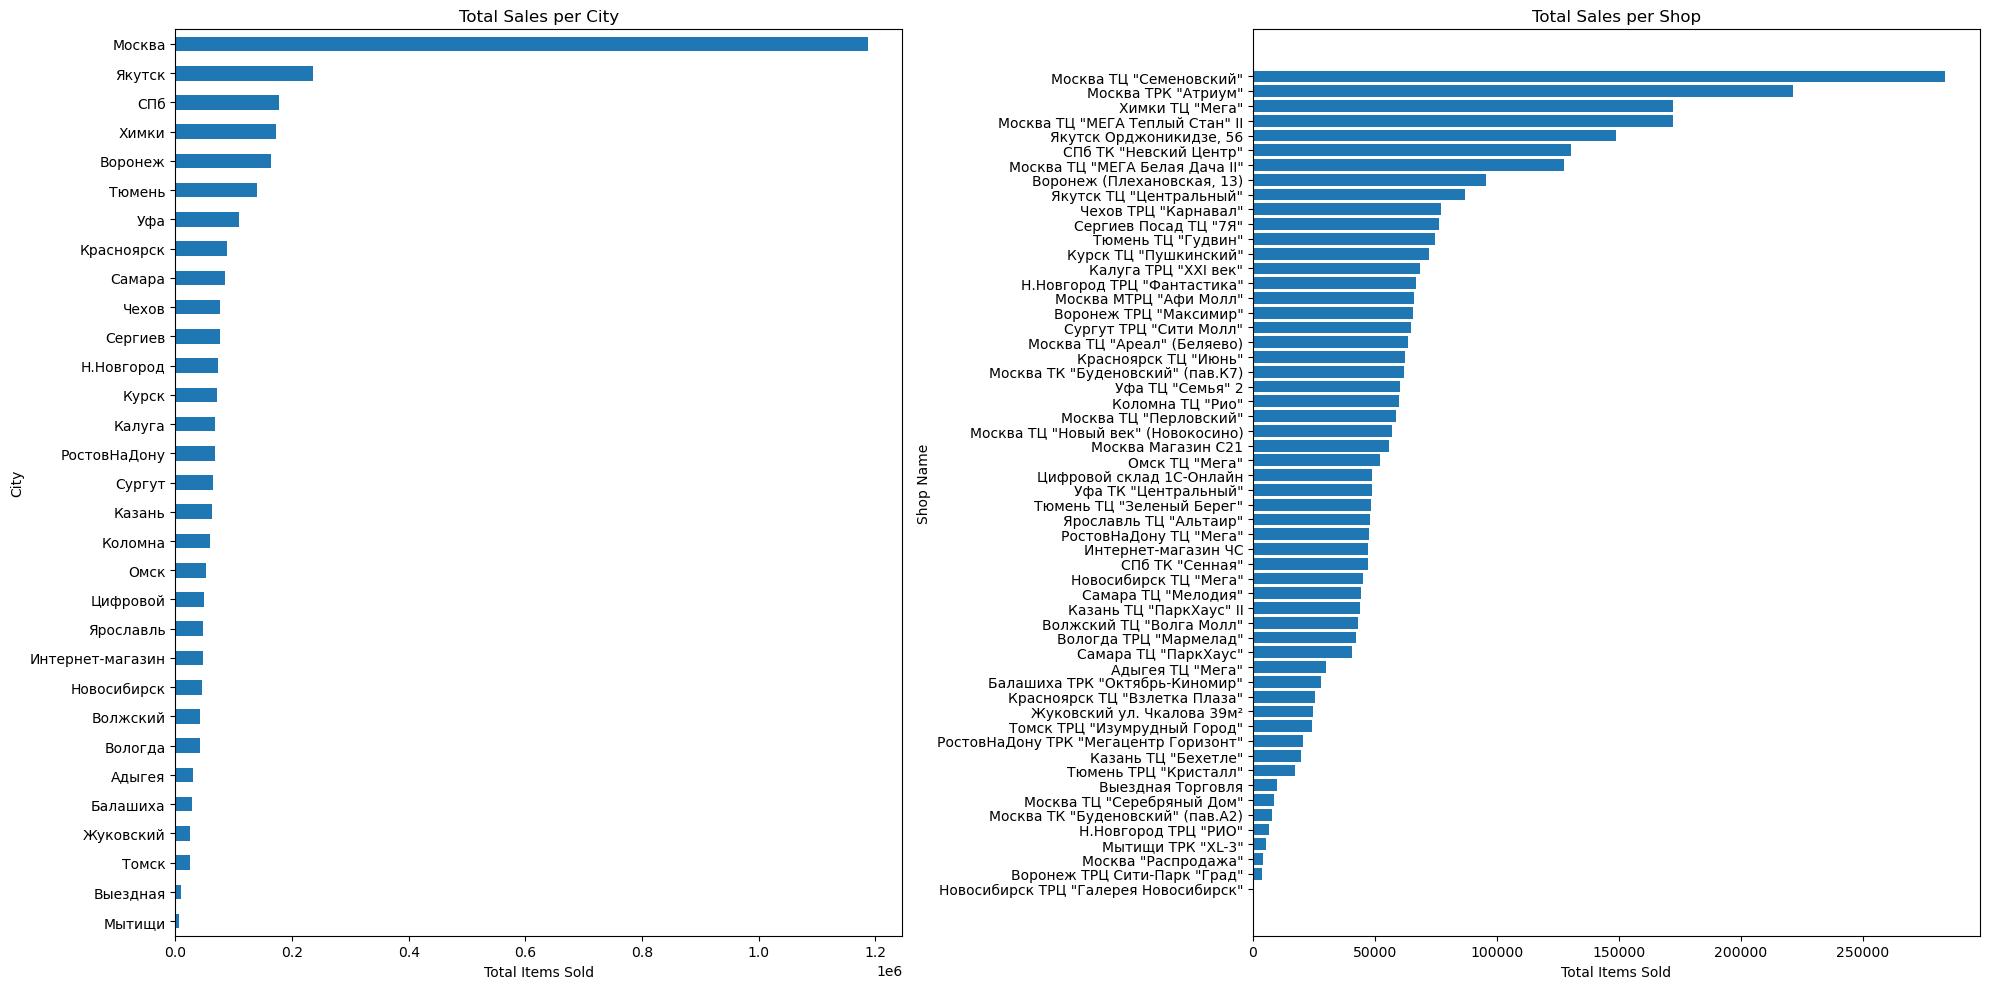

In [140]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

sales.groupby(['city'])['item_cnt_day'].sum().sort_values()\
     .plot(kind='barh', ax=axes[0], title='Total Sales per City')
axes[0].set_xlabel('Total Items Sold')
axes[0].set_ylabel('City')

axes[1].barh(shop_sales['shop_name'], shop_sales['item_cnt_day'])
axes[1].set_title('Total Sales per Shop')
axes[1].set_xlabel('Total Items Sold')
axes[1].set_ylabel('Shop Name')

plt.tight_layout()

## Prices over cities

In [141]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,general_item_category_name,shop_name,city,was_item_price_outlier,was_item_cnt_day_outlier
0,2013-01-01,0,2,991,99.0,1.0,"3D Action Puzzle ""Динозавры"" Тиранозавр",67,Подарки - Развитие,Подарки,"Адыгея ТЦ ""Мега""",Адыгея,0,0
1,2013-01-01,0,2,1472,2599.0,1.0,"Assassin's Creed 3 [Xbox 360, русская версия]",23,Игры - XBOX 360,Игры,"Адыгея ТЦ ""Мега""",Адыгея,0,0
2,2013-01-01,0,2,1905,249.0,1.0,"Bestseller. Grand Theft Auto: San Andreas [PC,...",30,Игры PC - Стандартные издания,Игры,"Адыгея ТЦ ""Мега""",Адыгея,0,0
3,2013-01-01,0,2,2920,599.0,2.0,Disney. LEGO Пираты Карибского моря (Essential...,21,Игры - PSP,Игры,"Адыгея ТЦ ""Мега""",Адыгея,0,0
4,2013-01-01,0,2,3320,1999.0,1.0,"FIFA 13 (с поддержкой PS Move) [PS3, русская в...",19,Игры - PS3,Игры,"Адыгея ТЦ ""Мега""",Адыгея,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935421,2015-10-31,33,59,20730,499.0,1.0,"Фигурка Scalers Wave 1 Alien 2""",72,Подарки - Фигурки,Подарки,"Ярославль ТЦ ""Альтаир""",Ярославль,0,0
2935422,2015-10-31,33,59,20866,699.0,1.0,Фигурка Tom Clancy's Splinter Cell Blacklist S...,72,Подарки - Фигурки,Подарки,"Ярославль ТЦ ""Альтаир""",Ярославль,0,0
2935423,2015-10-31,33,59,20949,5.0,1.0,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",Подарки,"Ярославль ТЦ ""Альтаир""",Ярославль,0,0
2935424,2015-10-31,33,59,21369,169.0,1.0,ХОББИТ: БИТВА ПЯТИ ВОИНСТВ (регион),40,Кино - DVD,Кино,"Ярославль ТЦ ""Альтаир""",Ярославль,0,0


<Axes: title={'center': 'Mean price over cities'}, ylabel='city'>

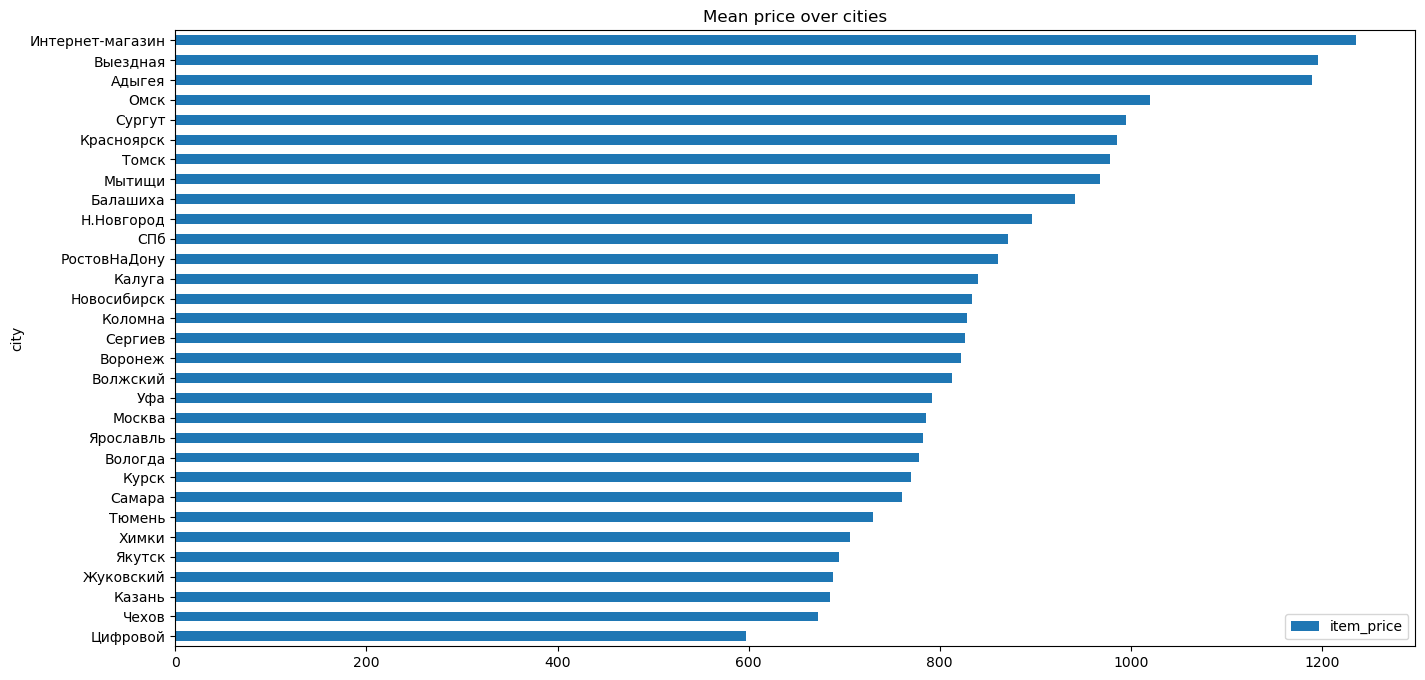

In [143]:
sales.groupby(['city']).agg({'item_price':'mean'}).sort_values(by='item_price')\
    .plot(figsize=(16,8) , kind = 'barh', title = 'Mean price over cities')

# Feature engineering

Before start let's check one more time our test data for which we will make predictions

In [80]:
test.sample(5)

,ID,shop_id,item_id
27743,27743,7,20336
113547,113547,49,18646
178417,178417,35,14794
172999,172999,37,1567
163429,163429,36,7462


As we can see we have a lack of information - we don't have item price, which we also will need to add. 